In [176]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import scipy.optimize as opt
import seaborn as sns
from sklearn import preprocessing

In [177]:
dataset = pd.read_csv("bank-direct-marketing-campaigns.csv")

In [178]:
dataset.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [179]:
dataset = dataset[['age','housing', 'loan', 'y','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m', 'nr.employed']]
dataset['y'].replace('no', 0, inplace=True)
dataset['y'].replace('yes', 1, inplace=True)
dataset['housing'].replace('yes', 1, inplace=True)
dataset['housing'].replace('no', 0, inplace=True)
dataset["housing"].replace('unknown', 0, inplace=True)
dataset['loan'].replace('yes', 1, inplace=True)
dataset['loan'].replace('no', 0, inplace=True)
dataset["loan"].replace('unknown', 0, inplace=True)
dataset[['age','y','campaign','previous','pdays']] = dataset[['age','y','campaign','previous','pdays']].astype('float')
dataset.head()

,age,housing,loan,y,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,0,0,0.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
1,57.0,0,0,0.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
2,37.0,1,0,0.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,0,0.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
4,56.0,0,1,0.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0


<Axes: xlabel='y', ylabel='age'>

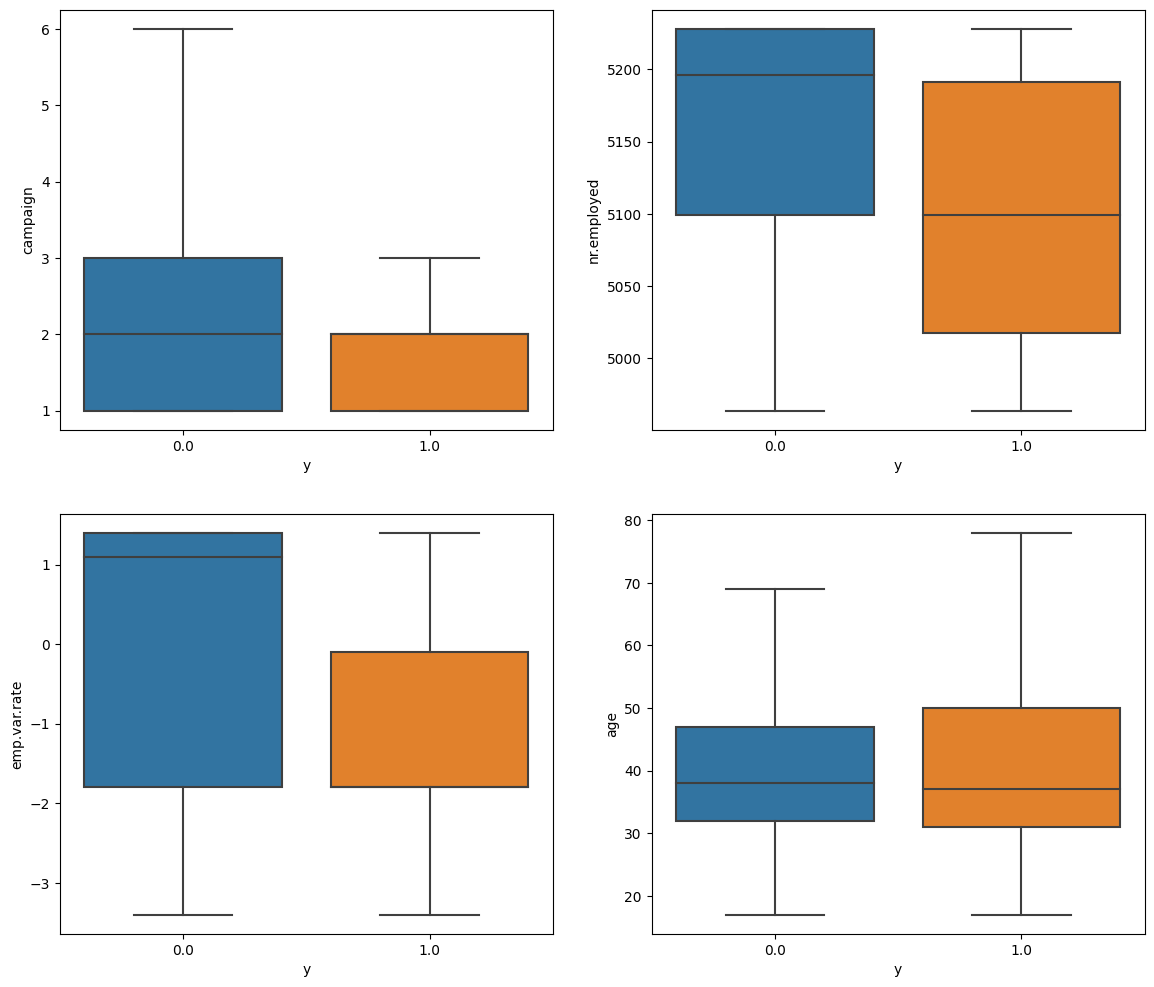

In [180]:
#creation of boxplots using sns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize =(14, 12))
ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]

sns.boxplot(ax=ax11, x = 'y', y ='campaign', data = dataset, sym = "")
sns.boxplot(ax=ax12, x = 'y', y ='nr.employed', data = dataset, sym = "")
sns.boxplot(ax=ax21, x = 'y', y ='emp.var.rate', data = dataset, sym = "")
sns.boxplot(ax=ax22, x = 'y', y ='age', data = dataset, sym = "")


(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,  4640.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 

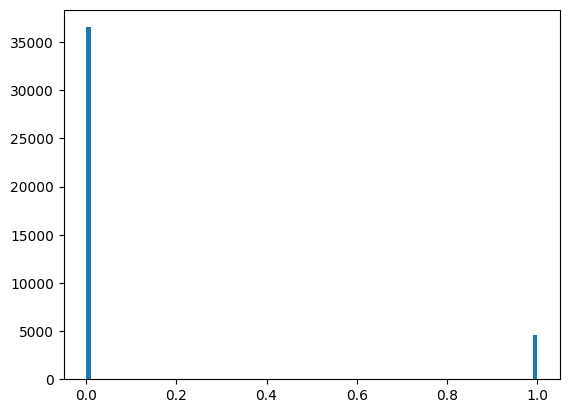

In [181]:
plt.hist(dataset['y'], bins = 100)

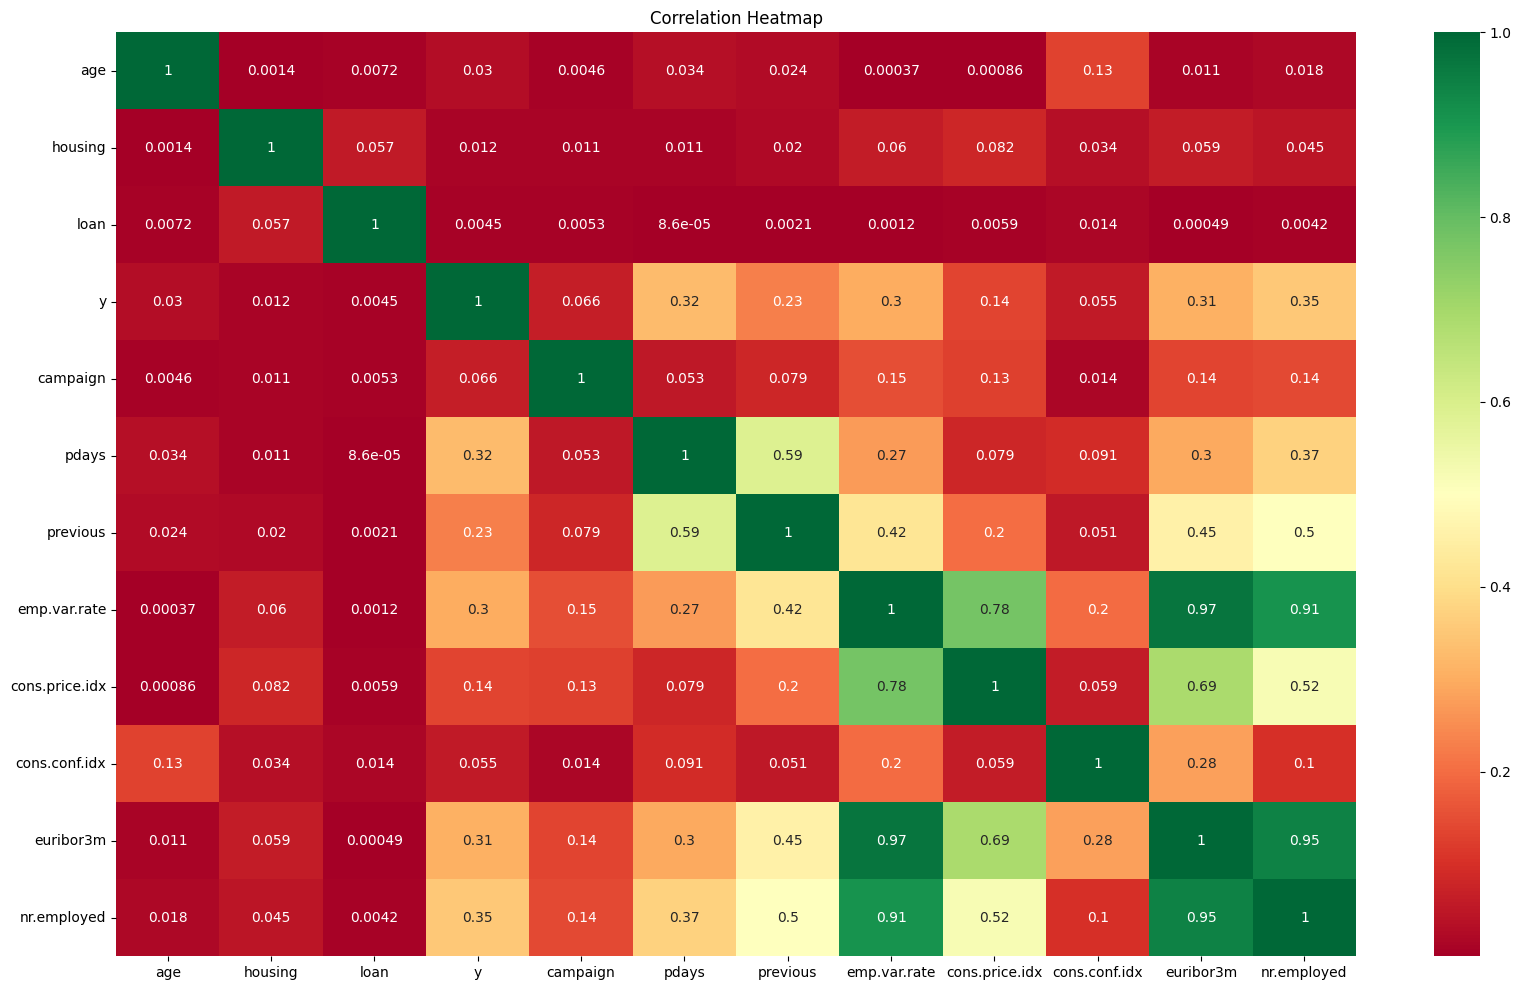

In [182]:
plt.figure(figsize=(20,12))
#draws heatmap with input as the correlation matrix calculted by(data.corr())
sns.heatmap(dataset.corr().abs(), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4640.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

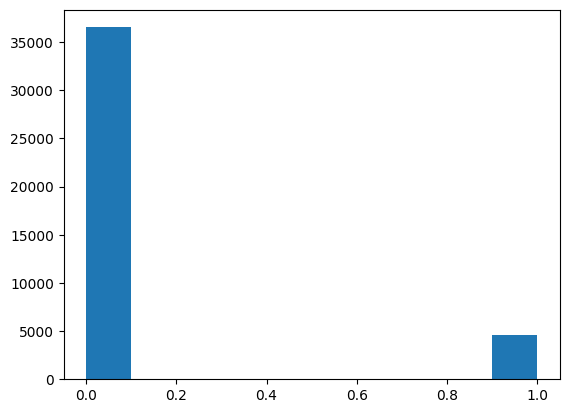

In [183]:

plt.hist(dataset['y'])

In [184]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   housing         41188 non-null  int64  
 2   loan            41188 non-null  int64  
 3   y               41188 non-null  float64
 4   campaign        41188 non-null  float64
 5   pdays           41188 non-null  float64
 6   previous        41188 non-null  float64
 7   emp.var.rate    41188 non-null  float64
 8   cons.price.idx  41188 non-null  float64
 9   cons.conf.idx   41188 non-null  float64
 10  euribor3m       41188 non-null  float64
 11  nr.employed     41188 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 3.8 MB


In [185]:
X = np.asarray(dataset[['age', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']])


In [186]:
y = np.asarray(dataset['y'])
y[0:5]

array([0., 0., 0., 0., 0.])

In [187]:
#normalize data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.53, -0.57,  0.2 , -0.35,  0.72,  0.89,  0.71,  0.33],
       [ 1.63, -0.57,  0.2 , -0.35,  0.72,  0.89,  0.71,  0.33],
       [-0.29, -0.57,  0.2 , -0.35,  0.72,  0.89,  0.71,  0.33],
       [-0.  , -0.57,  0.2 , -0.35,  0.72,  0.89,  0.71,  0.33],
       [ 1.53, -0.57,  0.2 , -0.35,  0.72,  0.89,  0.71,  0.33]])

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print("Training:", X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training: (32950, 8) (32950,)
Test set: (8238, 8) (8238,)


In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#other optimizers: 'liblinear', 'newton-cg', lbfgs', 'sag', 'saga', 'solvers', to see if LR becomes more accurate
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [233]:
yhat = LR.predict(X_test)
yhat[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [213]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=0)

0.8969148804361293

In [208]:
from sklearn.metrics import log_loss
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.28909943523030196

In [209]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False,
                        title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalize confusion matrix")
    else:
        print("Confusion matrix, no normalization")
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment='center',
            color='white' if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicated label")
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 167  763]
 [  69 7239]]


Confusion matrix, no normalization
[[ 167  763]
 [  69 7239]]


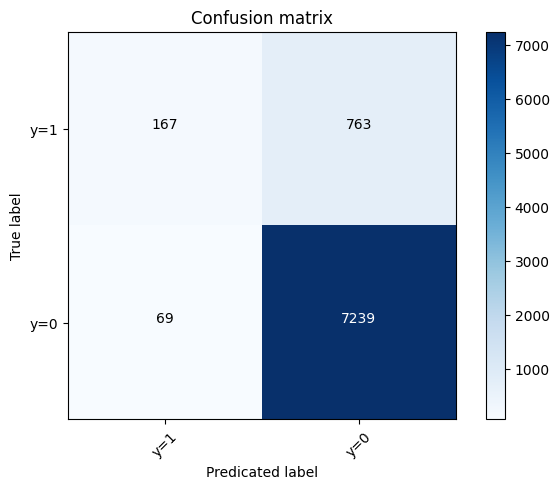

In [210]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['y=1', 'y=0'], normalize = False, title='Confusion matrix')

In [204]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95      7308
         1.0       0.71      0.18      0.29       930

    accuracy                           0.90      8238
   macro avg       0.81      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



(array([3.88e+04, 1.71e+03, 4.46e+02, 1.30e+02, 6.60e+01, 3.20e+01,
        1.00e+01, 7.00e+00, 0.00e+00, 1.00e+00]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <BarContainer object of 10 artists>)

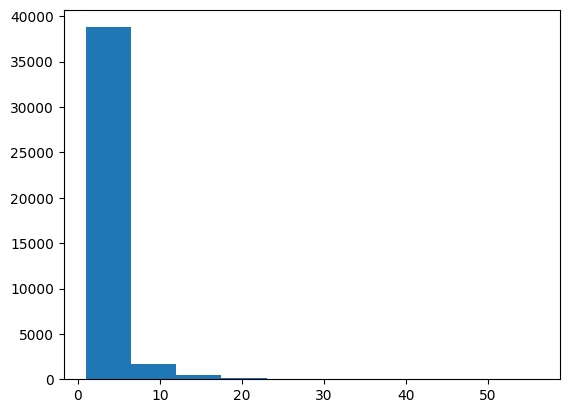

In [196]:
plt.hist(dataset['campaign'])